# 3.1 Supervised Learning

In [ ]:
# 1. K-Nearest Neighbors
# 2. Support Vector Machine
# 3. Decision Tree
# 4. Logistic & Linear Regression

## 3.1.1 K-nearest neighbor (KNN)

In [2]:
# 라이브러리 호출 및 데이터 준비

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

dataset = pd.read_csv('data/chap03/iris.data', names=names)

In [5]:
# 훈련과 검증 데이터셋 분리

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit(X_train).transform(X_train)
X_test = StandardScaler().fit(X_test).transform(X_test)

In [7]:
# 모델 생성 및 훈련

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [8]:
# 모델 정확도

from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
print("정확도: {}".format(accuracy_score(y_test, y_pred)))

정확도: 0.8666666666666667


In [9]:
# 최적의 K 찾기

k = 10
acc_array = np.zeros(k)
for k in np.arange(1, k+1, 1):
    classifier = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    acc_array[k-1] = acc
    
max_acc = np.amax(acc_array)
acc_list = list(acc_array)
k = acc_list.index(max_acc)
print("정확도", max_acc, "으로 최적의 k는", k+1, "입니다.")

정확도 0.9333333333333333 으로 최적의 k는 3 입니다.


## 3.1.2 Support Vector Machine (SVM)

In [17]:
# 라이브러리 호출

from sklearn import svm, metrics, datasets, model_selection
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
# '0' : 모든 로그가 표시
# '1' : INFO 로그를 필터링
# '2' : WARNING 로그를 필터링
# '3' : ERROR 로그를 추가로 필터링

In [18]:
# iris 데이터를 준비하고 훈련과 검증 데이터셋으로 분리

iris = datasets.load_iris()
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(iris.data,
                                 iris.target,
                                 test_size=0.6,
                                 random_state=42)

In [19]:
# SVM 모델에 대한 정확도

svm = svm.SVC(kernel='linear', C=1.0, gamma=0.5)
# C: 오류를 어느 정도 허용할지? small-> Hard Margin(오류 허용 X), large-> Soft Margin(오류 허용 O)
# gamma: 훈련 데이터에 얼마나 민감하게 반응할지? -> 너무 크면 Overfit!
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
score = metrics.accuracy_score(y_test, predictions)
print('정확도: {0:f}'.format(score))

정확도: 0.988889


## 3.1.3 Decision Tree (DT)

In [5]:
# 라이브러리 호출 및 데이터 준비

import pandas as pd
df = pd.read_csv('data/chap03/titanic/train.csv', index_col='PassengerId')
print(df.head())

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

In [6]:
# 데이터 전처리

df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = df.dropna()
X = df.drop('Survived', axis=1)
y = df['Survived']

In [7]:
# 훈련과 검증 데이터셋으로 분리

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
# 결정 트리 모델 생성

from sklearn import tree
model = tree.DecisionTreeClassifier()

In [9]:
# 모델 훈련

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
# 모델 예측

y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8324022346368715

In [11]:
# Confusion Matrix를 이용한 성능 측정

from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
)

,Predicted Not Survival,Predicted Survival
True Not Survival,99,13
True Survival,17,50


## 3.1.4 Logistic & Linear Regression

In [12]:
# 라이브러리 호출 및 데이터 준비

%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()

print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


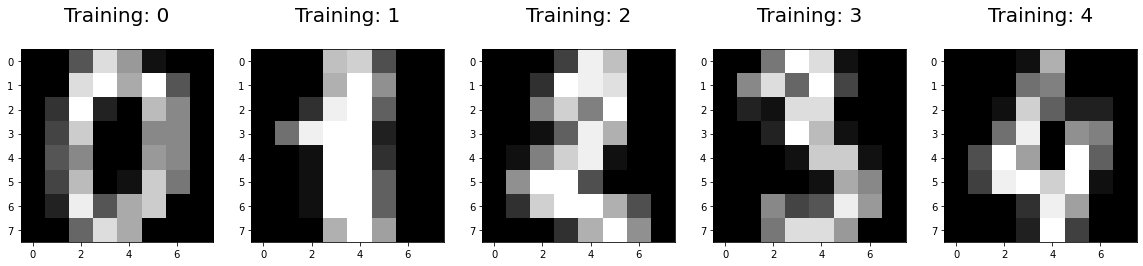

In [13]:
# digits 데이터셋의 시각화

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize=20)

In [16]:
# 훈련과 검증 데이터셋 분리 및 로지스틱 회귀 모델 생성

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
# 일부 데이터를 사용한 모델 예측

logisticRegr.predict(x_test[0].reshape(1,-1))
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [18]:
# 전체 데이터를 사용한 모델 예측

predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


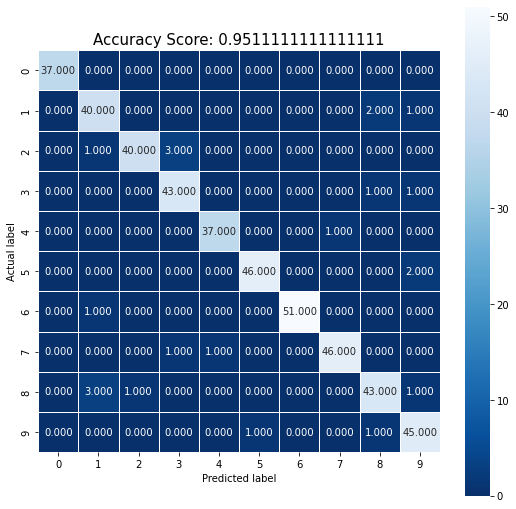

In [20]:
# confusion matrix visualization

import numpy as np
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt='.3f', linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15)
plt.show()

In [21]:
# 라이브러리 호출

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [22]:
# weather.csv 불러오기

dataset = pd.read_csv('data/chap03/weather.csv')

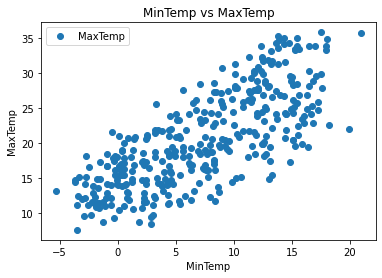

In [23]:
# 데이터 간 관계를 시각화로 표현

dataset.plot(x='MinTemp', y='MaxTemp', style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

In [27]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [28]:
# 회귀 모델에 대한 예측

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,11.8,15.594065
1,26.1,21.226789
2,13.7,21.798224
3,13.2,17.961442
4,25.2,23.594165
...,...,...
69,21.8,26.614611
70,15.4,15.185897
71,14.2,17.798175
72,15.0,17.553274


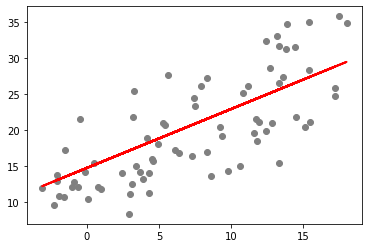

In [29]:
# 검증 데이터셋을 사용한 회귀선 표현

plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [30]:
# 선형 회귀 모델 평가

print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMS:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 23.081245394584755
RMS: 4.8042944741746165


# 3.2 Unsupervised Learning

In [ ]:
# 1. K-Means clustering
# 2. Density-based Spatial Clustering with Applications with Noise (DBSCAN)
# 3. Principal Component Analysis (PCA)

## 3.2.1 K-means clustering

In [31]:
# 라이브러리 호출

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [41]:
# 상품에 대한 연 지출 데이터 호출

data = pd.read_csv('data/chap03/sales data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [42]:
# 연속형 데이터와 명목형 데이터로 분류

categorical_features = ['Channel', 'Region']
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)

data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [46]:
# 데이터 전처리 (스케일링 적용)

mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

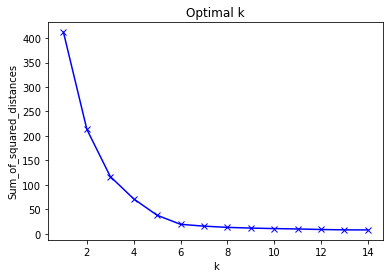

In [47]:
# 적당한 K 값 추출

Sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal k')
plt.show()

## 3.2.2 Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

In [ ]:
# 1. 엡실론 내 점 개수 확인 및 중심점 결정
# 2. 군집 확장
# 3. 1~2단계 반복
# 4. 노이즈 정의

## 3.2.3 Principal Component Analysis (PCA)

In [ ]:
pca = decomposition.PCA(n_component=1)
pca_x = pca.fit_transform(x_std)

result = pd.DataFrame(pca_x, columns=['dog'])
result['y-axis'] = 0.0
result['label'] = Y

sns.implot('dog', 'y-axis', data=result, fit_reg=False, scatter_kws={"s":50}, hue='label');

In [49]:
# 라이브러리 호출

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [50]:
# 데이터 불러오기

X = pd.read_csv('data/chap03/credit card.csv')
X = X.drop('CUST_ID', axis=1)
X.fillna(method='ffill', inplace=True)
print(X.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [51]:
# 데이터 전처리 및 데이터를 2차원으로 차원 축소

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)

pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())

         P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544827
2  0.330633  0.268878
3 -0.481656 -0.097611
4 -0.563512 -0.482506


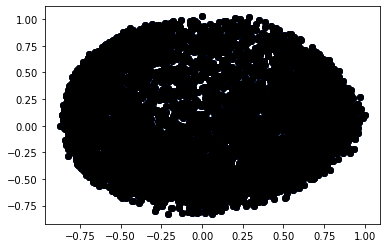

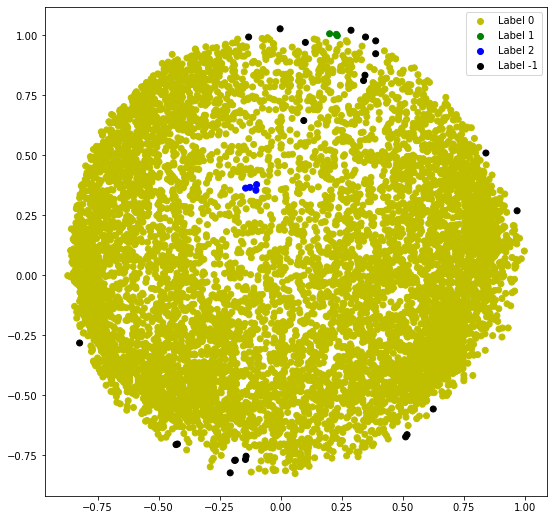

In [52]:
# DBSCAN 모델 생성 및 결과의 시각화

db_default = DBSCAN(eps=0.0375, min_samples=3).fit(X_principal)
labels = db_default.labels_

colours = {}
colours[0] = 'y'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

cvec = [colours[label] for label in labels]

r = plt.scatter(X_principal['P1'], X_principal['P2'], color='y');
g = plt.scatter(X_principal['P1'], X_principal['P2'], color='g');
b = plt.scatter(X_principal['P1'], X_principal['P2'], color='b');
k = plt.scatter(X_principal['P1'], X_principal['P2'], color='k');

plt.figure(figsize=(9,9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)

plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
plt.show()

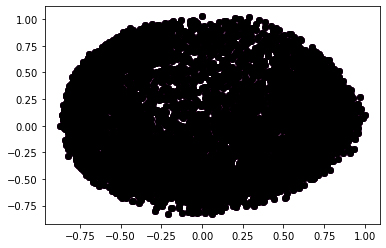

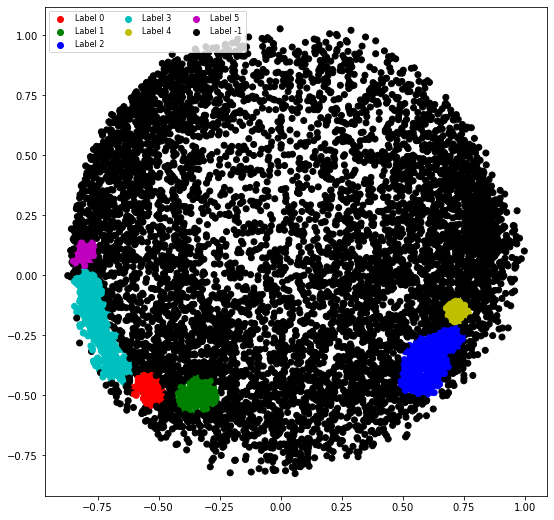

In [57]:
# 모델 튜닝

db = DBSCAN(eps=0.0375, min_samples=50).fit(X_principal)
labels1 = db.labels_

colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [colours1[label] for label in labels1]
colors1 = ['r', 'g', 'b', 'c', 'y', 'm', 'k']

r = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[0])
g = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[1])
b = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[2])
c = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[3])
y = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[4])
m = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[5])
k = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[6])

plt.figure(figsize=(9,9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)
plt.legend((r, g, b, c, y, m, k),
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=8)

plt.show()

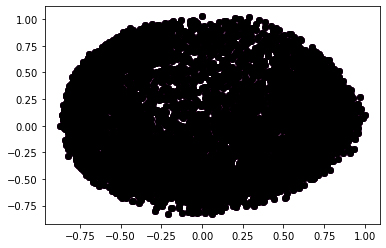

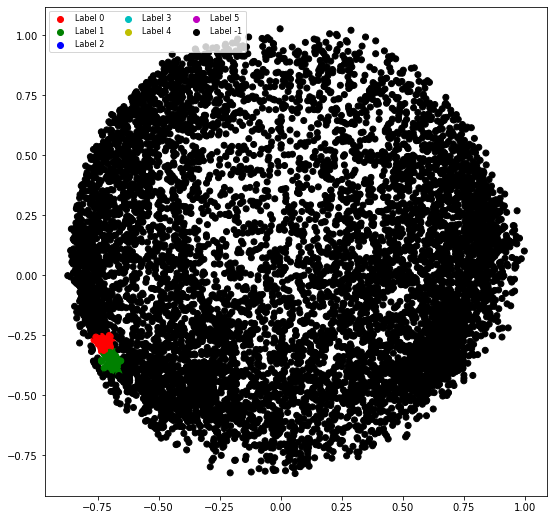

In [58]:
# 모델 튜닝

db = DBSCAN(eps=0.0375, min_samples=100).fit(X_principal)
labels1 = db.labels_

colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [colours1[label] for label in labels1]
colors1 = ['r', 'g', 'b', 'c', 'y', 'm', 'k']

r = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[0])
g = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[1])
b = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[2])
c = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[3])
y = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[4])
m = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[5])
k = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[6])

plt.figure(figsize=(9,9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)
plt.legend((r, g, b, c, y, m, k),
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=8)

plt.show()